# 회귀
## 개론
### 의미
* 여러개의 독립변수와 한개의 종속변수 간의 상관관계를 모델링 하는 기법의 총칭
    <br>- Y = W1X1+W2X2+W3X3...+WnXn
        - Y: 종속변수
        - X: 독립변수
        _ W: 회귀계수
* 머신러닝 회귀 예측의 핵심
    - 주어진 피처(독립변수)와 결정 값(종속변수) 데이터 기반 학습으로 최적의 회귀계수를 찾아내는 것
    
### 유형
* 회귀 계수이 결합 방식이 선형/비선형 여부
* 독립변수의 개수가 단일/복수 여부

### 종류(기본적인)
<br>1) 일반 선형 회귀
<br>- 예측과 실제 값의 RSS(Residual Sum of Squares)의 최소화 하는 회귀계수를 도출 
<br>- 규제(Regularization)를 적용하지않는다.
<br>
<br>2) 릿지(Ridge)
<br>- 선형회귀 + L2 규제 회귀 모델
<br>
<br>3) 라쏘(Lasso)
<br>- 선형회귀 + L1 규제 회귀 모델
<br>
<br>4) 엘라스틱넷(ElasticNet)
<br>- 선형회귀 + L1, L2 규제 회귀 모델
<br>
<br>5) 로지스틱 회귀(Logistic Regression)
<br>- 이름은 회귀지만 실제는 분류에 사용되는 선형 모델

## 단순 선형회귀(Simple Regression, SM model)
### 의미
* 독립변수와 종속변수의 관계를 선형 관계로 표현한 모델
    - y = wX+b 꼴
    - (w:회귀계수(weight), b:편향(bias))
    
#### RSS(Residual Sum of Square)이란?
* 오류값의 제곱을 구해서 더하는 방식
* RSS = (모델 예측값 - 실제값)^2의 총합
    <br>-기본적인 RSS는 위의 값을 의미하지만 실질적 활용에서는 전체 데이터의 수로 나눈 평균 값을 의미한다. 
* 분산의 개념으로 이해하면 된다. 이거는 평균은 아니지만.

#### RSS의 이해
* RSS는 weight와 bias의 식으로 표션이 가능하고 이것을 최소화 하는 값을 차즌 것이 회귀의 핵심이다.
* 회귀에서 RSS는 비용(Cost)라고 할 수 있다.
* 이러한 값을 구하는 함수를 비용함수(Cost function)이라고 하고 이 함수의 최소 값을 구하는 것이 회귀분석의 기초이다.

#### 비용 최소화-경사하강법(Gradient Descent)
##### 의미
* 반복적으로 비용 함수의 반환값이 작아지는 방향성을 가지고 W 파라미터를 지속적으로 보정하는 방법
* ex: 최초 오류= 100, 두번째 오류 = 80 ... 같은 방식으로 오류가 줄어드는 방향으로 W 값을 업데이트하면서 최소가 되는 값을 최소비용이라고 판단하고 W 파라미터 값을 반환
##### 방법
* weight, bias에 대한 비용함수의 편미분을 통해서RSS를 최소화 하는 weight값과 bias 값을 찾는다.
##### 과정
1) weight와 bias를 설정하고 비용함수의 값을 계산
2) 최초 weight와 bias에 대해서 학습률(learning weight, step)을 적용해서 업데이터를 하고 비용함수를 계산하고 해당 과정을 반복해 최소값을 찾는다.
3) 학습률(learning weight, step)
    - 현재 점에서 다음 점으로 이동하는 정도
    - 너무 작으면 학습 속도가 매우 느리다.
    - 너무 크면 최소값을 지나칠 위험이 있다.
    
##### hard 코딩을 통한 경사하강법 예시

4.0930001136140595 5.955991561432985
0.8321033313881988


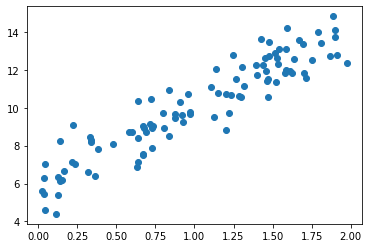

In [3]:
# 경사하강법의 하드 코딩 -> 이거는 그냥 경사 하강법의 예시인 것이고, 어디까지나 
#                         iter 반복 학습의 결과값을 보여주고 그 이전에 gradient가 0에
#                         도달해서 해당 값이 나온 것 뿐, 이 코딩의 결과값이 항상
#                         최적을 도출하는 것이 절대 아니다.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(11)
X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

def get_weitht_update(w1,w0,X,y,learning_rate=0.01):
    N = len(y) #y의 길이를 정수 표현
    
    w1_update = np.zeros_like(w1)  # [0] array 생성
    w0_update =np.zeros_like(w0)   # [0] array 생성
    
    y_pred = np.dot(X,w1.T) + w0  #X값에 대한 예측 y값 행렬
    diff = y - y_pred            # 잔차 행렬
    
    w0_factors = np.ones((N,1))  # y와 길이가 같은 1행렬 생성  
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))              
    # w1에 대한 편차제곱의 평균에 대한 편미분의 시그마(총합) -> MSE에 대한 w1 편미분
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff)) 
    # w0에 대한 편차제곱의 평균에 대한 편미분의 시그마(총합) -> MSE에 대한 w0 편미분
    
    return w1_update, w0_update
    
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weitht_update(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N   #모든 편차^2의 평균
    return cost
    
w1, w0 = gradient_descent_steps(X,y,iters=10000)
print(w1[0,0],w0[0,0])

y_pred = w1[0,0]*X + w0
print(get_cost(y,y_pred))


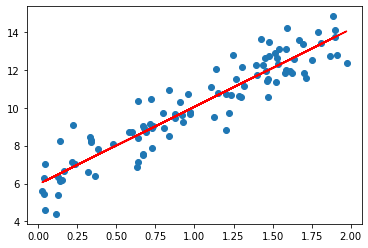

In [4]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='r')

In [5]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    #batch_size: 원소를 뽑는 개수 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 10000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        #정수에 대해서는 np.arange(), 
        #1차 행렬에 대해서 원소를 임의로 섞는다. 
        
        sample_x = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 섞인 행렬에 대해서 0~batch_size-1 만큼 원소를 뽑는다.
        
        w1_update, w0_update = get_weitht_update(w1,w0,sample_x,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

np.random.permutation(X.shape[0])

array([59, 83,  3,  1, 89,  9, 93, 20, 72, 47, 15, 60, 51, 97, 36, 18, 23,
       84, 40, 29, 27, 57, 14, 50, 70, 67,  2, 69, 48, 78, 35, 13, 10, 31,
       91, 76,  0, 25, 85, 96, 63, 88,  5,  8,  7, 73, 86, 39, 71, 92, 79,
       56, 75, 90, 94, 81, 46, 21, 24, 58, 99, 54, 38, 66, 55, 37, 41, 16,
       43, 45, 33, 74,  6, 68, 98, 19, 32, 17, 26, 44, 49, 80, 11, 34,  4,
       22, 12, 95, 42, 87, 53, 64, 61, 30, 77, 62, 82, 52, 28, 65])

In [6]:
w1 , w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print(get_cost(y,y_pred))

w1: 4.119 w0: 5.928
0.8323196781951812


위의 과정은 sklearn의 LinearRegression으로 쉽게 도출 할 수 있다.

#### 선형회귀의 다중공선성 문제
* 독립 변수가 너무 많은 경우 독립변수 간 상관관계가 발생해 분산이 매우 커져 오류에 매우 민감해 질 수 있기 때문에 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요 피처를 제외하거나 일종의 규제를 적용한다.

### 회귀의 평가 지표
#### MAE(Mean Absoulte Error)
* 실제값과 예측 값의 차이를 절댓값으로 변환해 평균한 것이다.

#### MSE(Mean Square Error)
* 실제갑과 예측값 차이를 제곱해서 평균한 것을 의미한다. = RSS의 실질적 의미

#### RMSE(Root Mean Square Error)
* MSE는 오류의 제곱으로 실제 오류의 평균보다 값이 커지는 일이 발생하여 루트를 씌운것

#### R^2
* (예측값의 분산)/(실제값의 분산)
* 분산 기반 예측 성능 평가
* 1에 가까울수록 예측의 정확도가 높다.

### sklearn의 회귀 평가 API
* sklearn의 머신러닝 모델 구성 시 scoring 파라미터에 평가 기준을 설정할 수 있는데 이것을 기준으로 GridSearchCV나 cross_val_score() 등을 실행한다. 
* 이때, MAE,MSE,R^2은 적용할 수 있지만 RMSE는 MSE에 루트를 씌우는 함수를 별도로 만들어야 한다.
* 관련 주의사항은 PPT자료 '사이킷런 Scoring 함수 회귀 평가 적용시 유의사항'을 참고하자

### 선형 회귀 모델 예제
#### 키, 몸무게의 선형회귀 모델

[79.6131561]


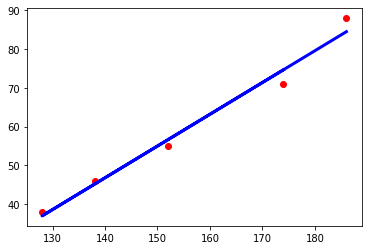

In [11]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174],[152],[138],[128],[186]]
# sklearn 독스에 적힌 fit method의 X값 조건을 맞추기 위한
# 형식
y = [71,55,46,38,88]

reg.fit(X,y)
print(reg.predict([[180]]))

# 시각화
plt.scatter(X,y,c='r')
y_pred = reg.predict(X)

plt.plot(X,y_pred,c='b',linewidth=3)
plt.show()

#### 당뇨병 회귀 모형

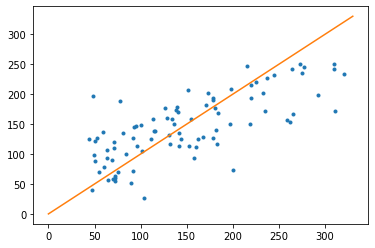

In [19]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets

diabetes = datasets.load_diabetes()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                   diabetes.target,
                                                   test_size=0.2,
                                                   random_state=312)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.plot(y_test,y_pred,'.')

x = np.linspace(0,330,100)
y = x
plt.plot(x,y)
plt.show()


#### 보스턴 집값 회귀 예측 모형

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['Price'] = boston.target

bostonDF.columns

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

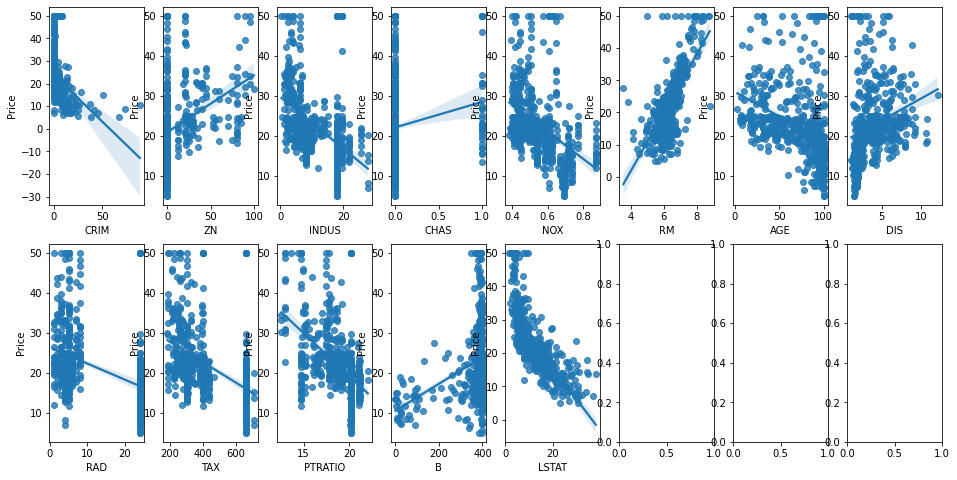

In [56]:
# 피처, 타겟 상관관계 파악
fig, axs = plt.subplots(figsize=(16,8), ncols=8,nrows=2)
lm_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
for i , features in enumerate(lm_features):
    row = int(i/8)
    col = i%8
    sns.regplot(x=features,y='Price',data=bostonDF,ax=axs[row][col])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['Price']
X_data = bostonDF.drop('Price',axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3, 
                                                 random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('MSE:',mse)
print('RMSE',rmse)
print('Variance score:',r2)

print('절편(편향치,bias)',lr.intercept_)
print('개별 독립변수의 회귀계수:',np.round(lr.coef_,1))

MSE: 17.296915907902054
RMSE 4.158956107955704
Variance score: 0.7572263323138935
절편(편향치,bias) 40.9955951721646
개별 독립변수의 회귀계수: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [68]:
# 개별 독립변수의 회귀계수의 큰순 정렬
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [81]:
# kfold를 활용한 교차검증을 통한 mse,rmse 도출
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y=y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5fold 개별 negative mse score \n',neg_mse_scores)
print('5fold 개별 rmse score\n',rmse_scores)
print('5fold 평균 rmse score\n',avg_rmse)

5fold 개별 negative mse score 
 [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
5fold 개별 rmse score
 [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
5fold 평균 rmse score
 5.828658946215837


## 다항 선형 회귀